# **Project Name**    -Netflix Movies and TV Shows Clustering


##### **Project Type**    -Unsupervised

# **Project Summary -**

Project Summary: Netflix Movies and TV Shows Clustering
In this exciting project, we delved into the vast world of Netflix movies and TV shows to uncover hidden patterns and similarities within the content. Our objective was to cluster similar movies and TV shows based on various features and text-based data.
We began by collecting a comprehensive dataset from Flixable, encompassing essential information such as genres, release years, cast, and more. We meticulously handled missing values and conducted thorough statistical testing to ensure the data's integrity.
Next, we embarked on an exploration of Netflix content, using data visualization and analysis to reveal intriguing insights. We visualized trends in the number of movies and TV shows over time, analyzed the distribution of genres, and investigated content availability across different countries.
The core of our project involved leveraging advanced NLP methods, including tokenization and word embeddings like Word2Vec, to process textual data such as titles and descriptions. By transforming text into numerical representations, we made it possible to apply clustering algorithms.
We employed both KMeans and Agglomerative Clustering algorithms to group similar movies and TV shows together. To ensure optimal clustering, we calculated metrics such as WCSS, silhouette score, and identified the elbow point.
One of the highlights of our project was visualizing the results of Agglomerative Clustering using a dendrogram, providing a captivating representation of content similarity.
The outcome was a well-organized cluster of Netflix movies and TV shows, enabling us to identify patterns and themes within the content library. This clustering approach paved the way for further analysis, content recommendation strategies, and insights into Netflix's content distribution strategy.
Overall, our "Netflix Movies and TV Shows Clustering" project was a captivating journey into the world of data exploration and unsupervised learning, providing valuable insights and paving the way for potential future applications within the Netflix platform.

# **Problem Statement**


This project aims to analyze and cluster Netflix movies and TV shows to understand audience preferences, content trends, and regional variations. Key questions include the difference in the number of TV shows and movies, Netflix's focus shift, popular genres, geographical content distribution, and release trends over time.

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Display all the columns in the dataframe
pd.pandas.set_option("display.max_columns", None)

### Dataset Loading

In [2]:
# Load Dataset
movies=pd.read_csv("C:\\Users\\rajeev\\Downloads\\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [3]:
# Dataset First Look
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
movies.shape

(7787, 12)

### Dataset Information

In [5]:
# Dataset Info
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
movies.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
movies.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
# Missing Value perecentage
missing_percent=movies.isnull().sum() / len(movies)*100
missing_percent

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

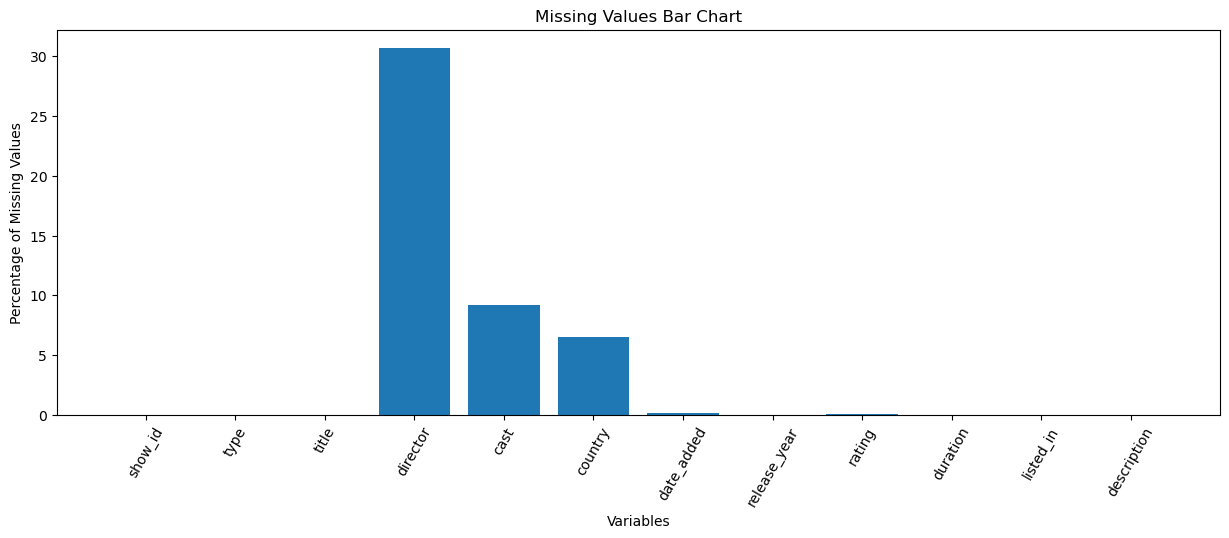

In [9]:
# Visualizing the missing values
# Bar Chart
plt.figure(figsize=(15, 5))
plt.bar(missing_percent.index, missing_percent)
plt.xticks(rotation=60)
plt.xlabel('Variables')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Bar Chart')
plt.show()


### What did you know about your dataset?

1. The Netflix dataset have 7,787 rows and 12 columns.
2. The dataset doest contain any duplicate values.
3. The dataset have null values in director, cast and country columns.The director columns have        majority of null value of 30%.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
movies.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

1. show_id: A unique identifier for each movie or TV show in the dataset.
2. type: Indicates whether the entry is a movie or a TV show.
3. title: The title of the movie or TV show.
4. director: The director(s) of the movie or TV show.
5. cast: The main cast or actors/actresses in the movie or TV show.
6. country: The country of origin or production for the movie or TV show.
7. date_added: The date when the movie or TV show was added to Netflix.
8. release_year: The year when the movie or TV show was released.
9.  rating: The content rating or age restriction for the movie or TV show.
10. duration: The duration or runtime of the movie or TV show.
11. listed_in: The genre(s) or category of the movie or TV show.
12. description: A brief description or summary of the movie or TV show.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
movies["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [13]:
movies["title"].unique()

array(['3%', '7:19', '23:59', ..., 'Zulu Man in Japan',
       "Zumbo's Just Desserts", "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"],
      dtype=object)

In [14]:
movies.director.unique()

array([nan, 'Jorge Michel Grau', 'Gilbert Chan', ..., 'Josef Fares',
       'Mozez Singh', 'Sam Dunn'], dtype=object)

In [15]:
movies.cast.unique()

array(['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi',
       'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
       'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
       ...,
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy',
       'Nasty C', 'Adriano Zumbo, Rachel Khoo'], dtype=object)

In [16]:
movies.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [17]:
movies.date_added.unique()

array(['August 14, 2020', 'December 23, 2016', 'December 20, 2018', ...,
       'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [18]:
movies.release_year.unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943], dtype=int64)

In [19]:
movies.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
movies.duration.unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [21]:
movies.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [22]:
movies.description.unique()

array(['In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.',
       'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.',
       "When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp.",
       ...,
       "In this documentary, South African rapper Nasty C hits the stage and streets of Tokyo, introducing himself to the city's sights, sounds and culture.",
       'Dessert wizard Adriano Zumbo looks for the next “Willy Wonka” in this tense competition that finds skilled amateurs competing for a $100,000 prize.',
       'This documentary delves into the mystique behind the blues-rock trio and explores how the enigmatic band created their iconic look and sound.'],
      dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.
##Changing "date_added" column from object to datetime for analysis
movies["date_added"]= pd.to_datetime(movies["date_added"])

In [24]:
# Making seprate column for day, month, year from date_added.
movies["day_added"]=movies["date_added"].dt.day
movies["month_added"]=movies["date_added"].dt.month
movies["year_added"]=movies["date_added"].dt.year

### What all manipulations have you done and insights you found?

I modified the "date added" column's data type from object to datetime format. Additionally, I split the "date added" column into separate columns for the day, month, and year, enabling more detailed analysis of when movies and TV shows were added to Netflix.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

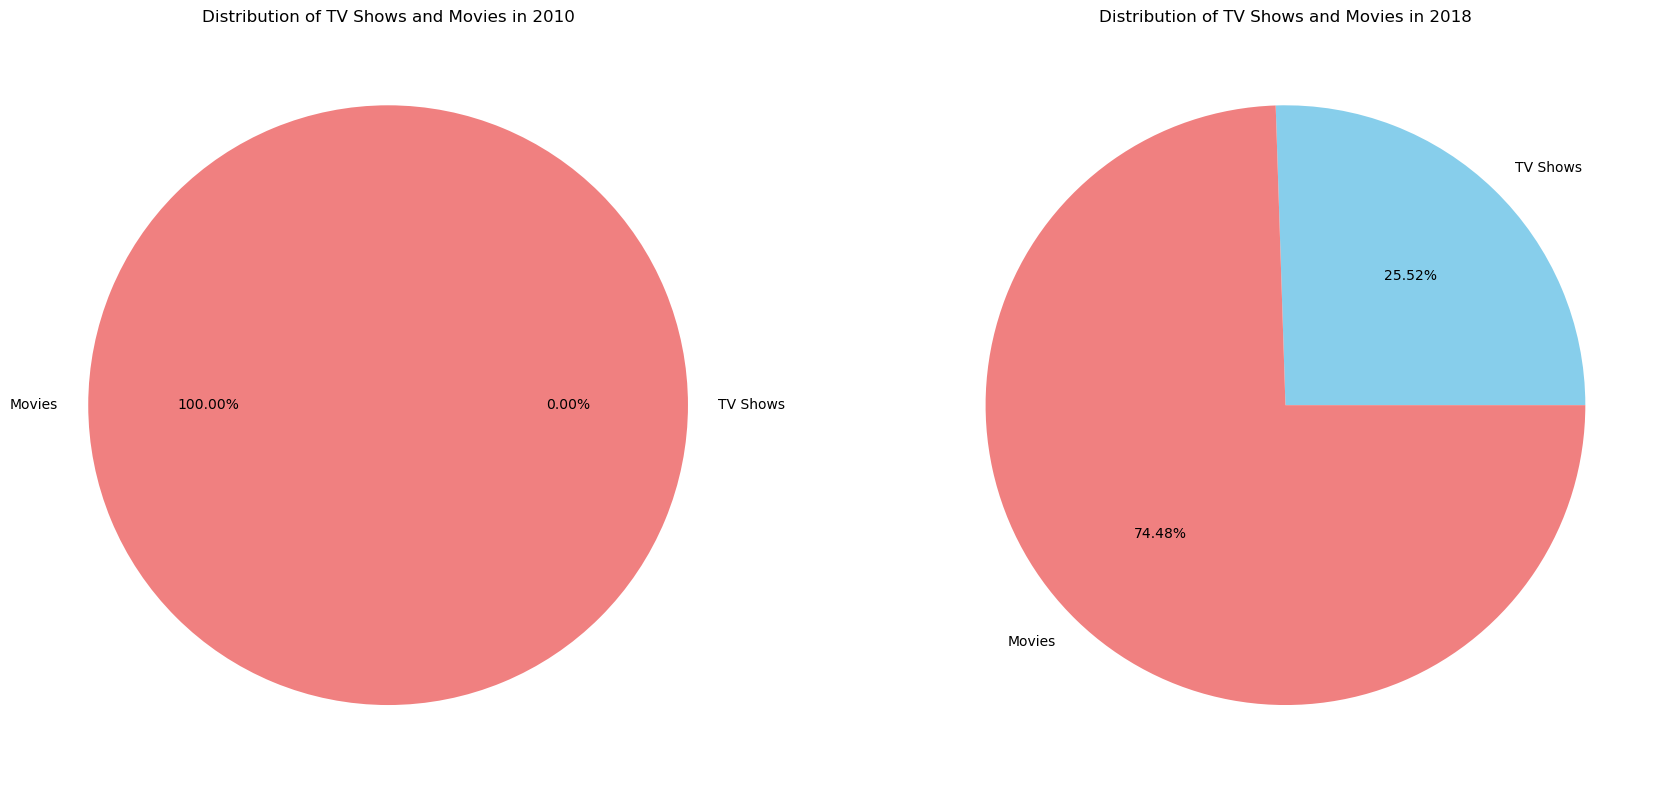

In [25]:
# Chart - 1 visualization code

# Filter the dataset for the years 2010 and 2018
movies_2010 = movies[movies['year_added'] == 2010]
movies_2018 = movies[movies['year_added'] == 2018]

# Calculate the total count of movies and TV shows for each year
movies_count_2010 = movies_2010[movies_2010['type'] == 'Movie'].shape[0]
movies_count_2018 = movies_2018[movies_2018['type'] == 'Movie'].shape[0]

tv_shows_count_2010 = movies_2010[movies_2010['type'] == 'TV Show'].shape[0]
tv_shows_count_2018 = movies_2018[movies_2018['type'] == 'TV Show'].shape[0]

# Calculate the percentage of TV shows and movies for each year
tv_shows_percentage_2010 = (tv_shows_count_2010 / (tv_shows_count_2010 + movies_count_2010)) * 100
movies_percentage_2010 = (movies_count_2010 / (tv_shows_count_2010 + movies_count_2010)) * 100

tv_shows_percentage_2018 = (tv_shows_count_2018 / (tv_shows_count_2018 + movies_count_2018)) * 100
movies_percentage_2018 = (movies_count_2018 / (tv_shows_count_2018 + movies_count_2018)) * 100

# Plot the pie charts
labels = ['TV Shows', 'Movies']
sizes_2010 = [tv_shows_percentage_2010, movies_percentage_2010]
sizes_2018 = [tv_shows_percentage_2018, movies_percentage_2018]
colors = ['skyblue', 'lightcoral']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

ax1.pie(sizes_2010, labels=labels, colors=colors, autopct='%1.2f%%')
ax1.set_ylabel('')
ax1.set_title('Distribution of TV Shows and Movies in 2010')

ax2.pie(sizes_2018, labels=labels, colors=colors, autopct='%1.2f%%')
ax2.set_ylabel('')
ax2.set_title('Distribution of TV Shows and Movies in 2018')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I used a pie chart to compare the percentage of TV shows and movies from 2010 to 2018.

##### 2. What is/are the insight(s) found from the chart?

Flixable, a third party Netflix search engine had released a report in 2018 that the number of Tv shows in netflix has nearly trippled since 2010.
Here we observe that from 2010 to 2018 the percentage of TV Shows has increased by 25.52%.

#### Chart - 2

In [26]:
# Date from the TV Shows and Movies added in the dataset
movies.date_added.min(), movies.date_added.max()


(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

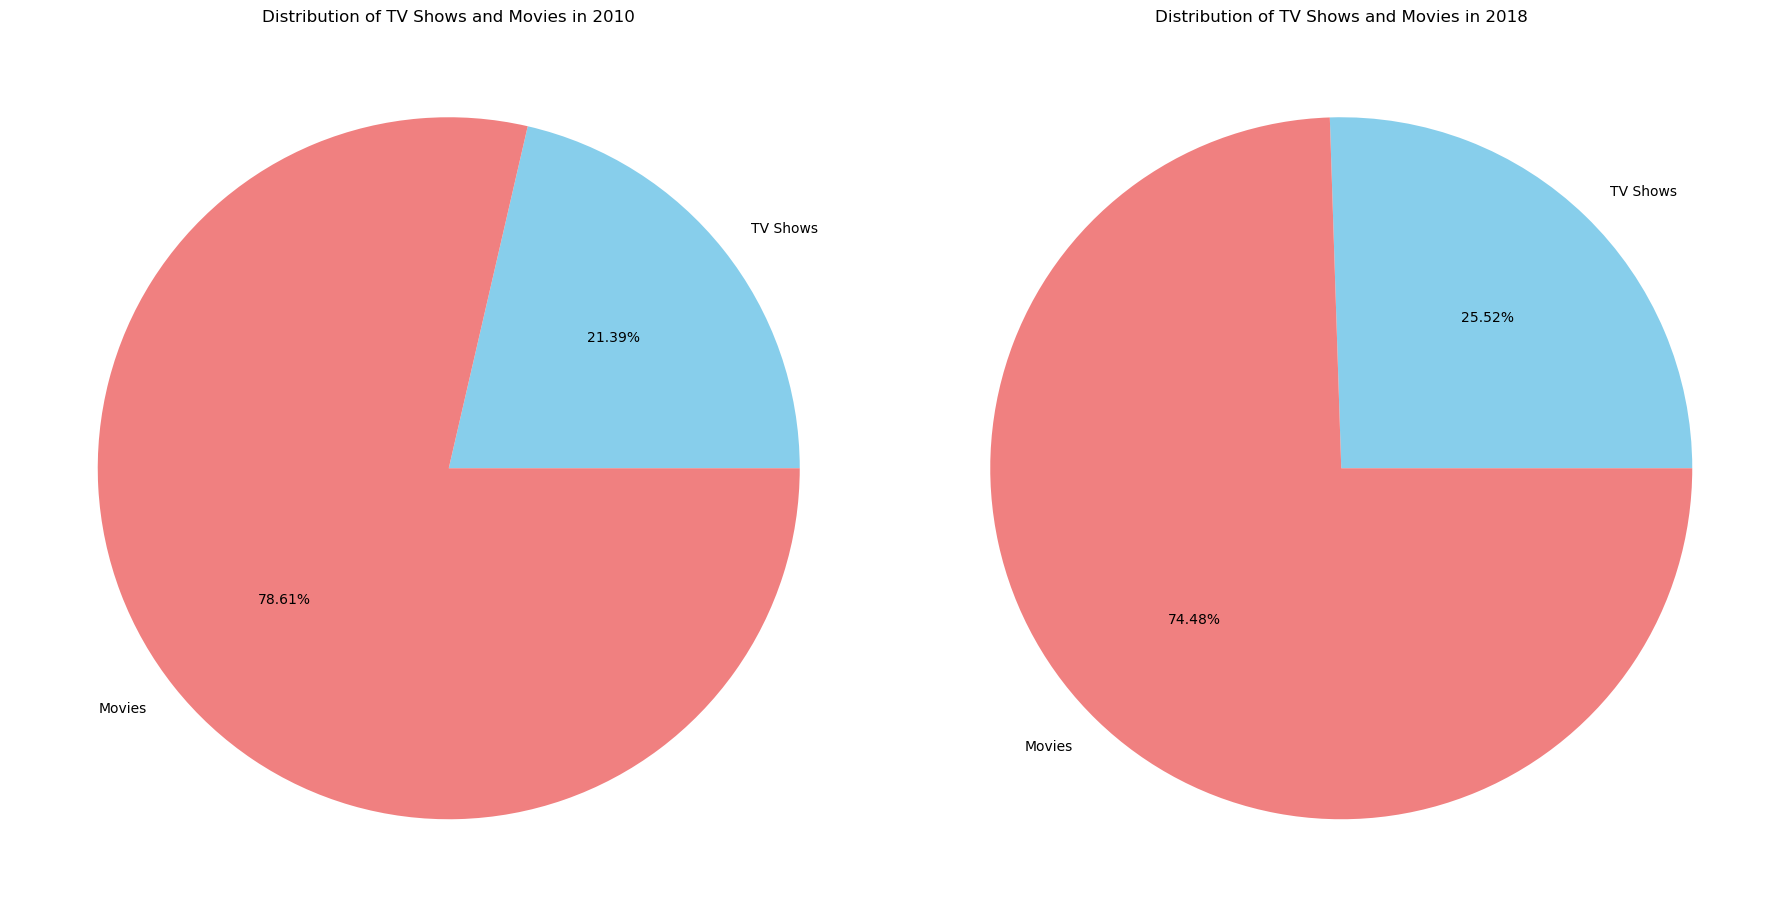

In [27]:
# Chart - 2 visualization code
# Filter the dataset for the years 2010 and 2018
movies_2010 = movies[movies['release_year'] == 2010]
movies_2020 = movies[movies['release_year'] == 2018]

# Calculate the total count of movies and TV shows for each year
movies_count_2010 = movies_2010[movies_2010['type'] == 'Movie'].shape[0]
movies_count_2020 = movies_2018[movies_2018['type'] == 'Movie'].shape[0]

tv_shows_count_2010 = movies_2010[movies_2010['type'] == 'TV Show'].shape[0]
tv_shows_count_2018 = movies_2018[movies_2018['type'] == 'TV Show'].shape[0]

# Calculate the percentage of TV shows and movies for each year
tv_shows_percentage_2010 = (tv_shows_count_2010 / (tv_shows_count_2010 + movies_count_2010)) * 100
movies_percentage_2010 = (movies_count_2010 / (tv_shows_count_2010 + movies_count_2010)) * 100

tv_shows_percentage_2018 = (tv_shows_count_2018 / (tv_shows_count_2018 + movies_count_2018)) * 100
movies_percentage_2018 = (movies_count_2018 / (tv_shows_count_2018 + movies_count_2018)) * 100

# Plot the pie charts
labels = ['TV Shows', 'Movies']
sizes_2010 = [tv_shows_percentage_2010, movies_percentage_2010]
sizes_2020 = [tv_shows_percentage_2018, movies_percentage_2018]
colors = ['skyblue', 'lightcoral']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 12))

ax1.pie(sizes_2010, labels=labels, colors=colors, autopct='%1.2f%%')
ax1.set_ylabel('')
ax1.set_title('Distribution of TV Shows and Movies in 2010')

ax2.pie(sizes_2018, labels=labels, colors=colors, autopct='%1.2f%%')
ax2.set_ylabel('')
ax2.set_title('Distribution of TV Shows and Movies in 2018')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the comparison between the percentages of TV shows and movies released from 2010 to 2018, along with the percentage increase in the release of TV shows during this period, I created a pie chart.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the pie chart, it is evident that there has been a slight increase in the percentage of TV show releases from 2010 to 2020. This observation indicates a growing trend in the release of TV shows during this period.

#### Chart - 3

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

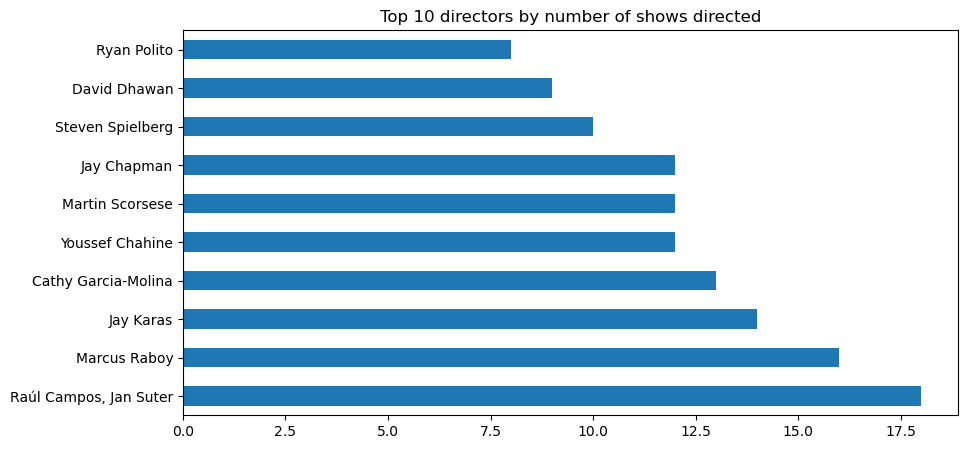

In [28]:
# Chart - 3 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
movies.director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

##### 1. Why did you pick the specific chart?

I utilized a bar chart to visualize the top 10 director in the Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

Upon examining the bar chart, it is apparent that Raul Campos, Marcus Raboy, and Jay Karas are the top three director in the Netflix dataset.

#### Chart - 4

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

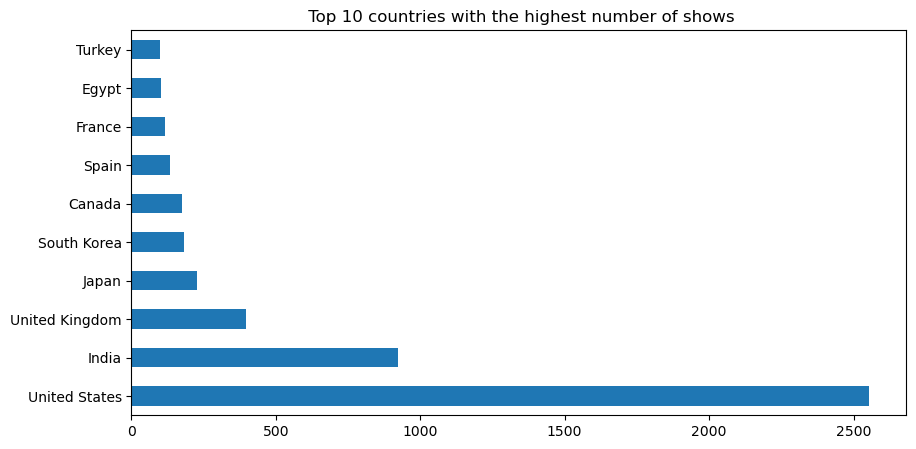

In [29]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
movies.country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

##### 1. Why did you pick the specific chart?

I utilized a bar chart to visualize the top 10 on Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

Based on the analysis, it is observed that the United States, India, and the United Kingdom have the highest number of shows on Netflix.

#### Chart - 5

Text(0.5, 1.0, 'Top 10 Actors')

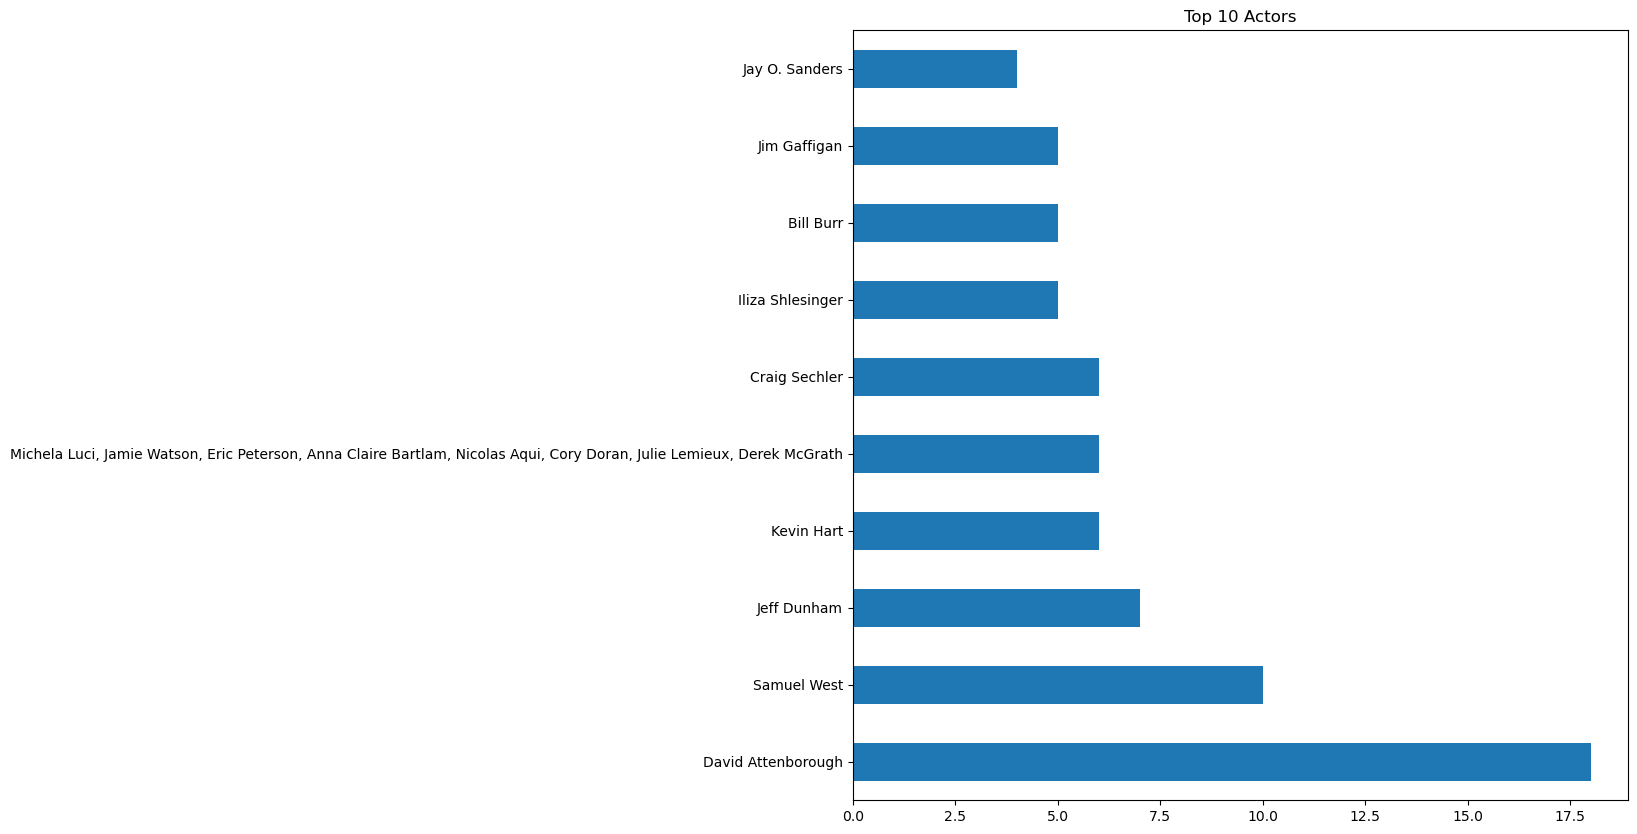

In [30]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 10))
movies.cast.value_counts().nlargest(10).plot(kind="barh")
plt.title("Top 10 Actors")

##### 1. Why did you pick the specific chart?

I used a bar chart to visualize the top 10 actors with the highest number of shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the bar chart, it is evident that David Attenborough, Samuel West, and Jeff Dunham are among the most popular actors on Netflix, with the highest number of shows attributed to them.

#### Chart - 6

Text(0.5, 1.0, 'Distribution by released year')

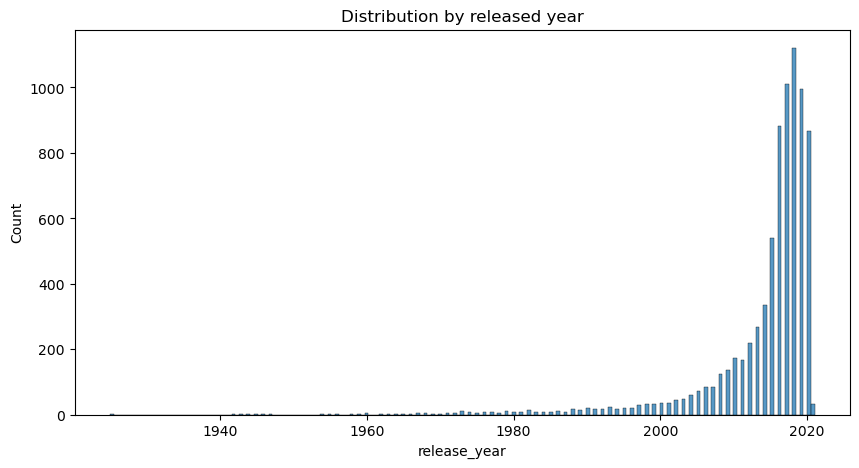

In [31]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.histplot(movies['release_year'])
plt.title('Distribution by released year')

##### 1. Why did you pick the specific chart?

I utilized a histogram plot to visualize the distribution of TV shows and movies based on their released year on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Before year 2000 the production of Movies and TV Shows are same, but after year 2000 there is a huge growth in the production fo the Movies as compared to the TV Shows of the Netflix, but after 2020 the production of both of them is almost sameer Here

#### Chart - 7

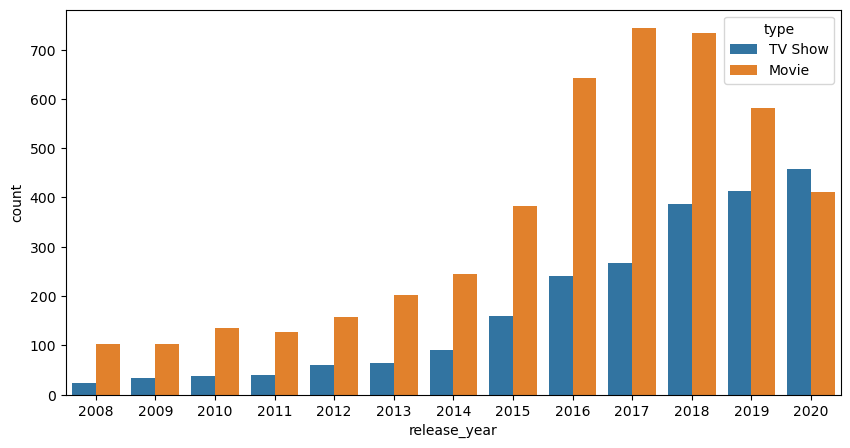

In [32]:
# Chart - 7 visualization code
# Number of shows released each year since 2008
order = range(2008,2021)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=movies, hue='type',
                  order = order)

##### 1. Why did you pick the specific chart?

I used a countplot to visualize the distribution of released years for movies and TV shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the countplot, it is evident that there is a higher number of movie releases compared to TV show releases between the years 2008 and 2020 on Netflix. This observation suggests that Netflix has focused more on adding movies to its content library during this time period.

#### Chart - 8

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

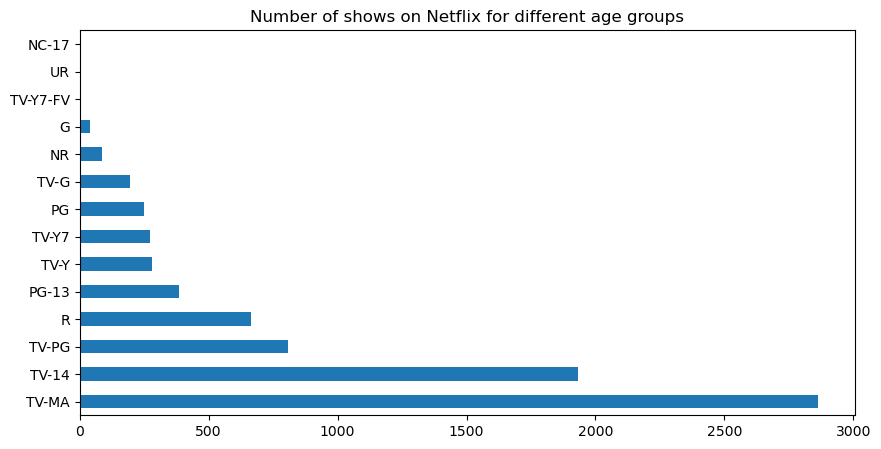

In [33]:
# Chart - 8 visualization code
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
movies.rating.value_counts().plot(kind='barh')
plt.title('Number of shows on Netflix for different age groups')

##### 1. Why did you pick the specific chart?

I utilized a bar plot to visualize the ratings of movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

Upon examining the bar plot, it is clear that TV-MA, which represents an 18+ rating for TV shows, and TV-14, which represents a 14+ rating for TV shows, are the most common ratings for both movies and TV shows available on Netflix.

#### Chart - 9

Text(0.5, 1.0, 'Top 10 genres')

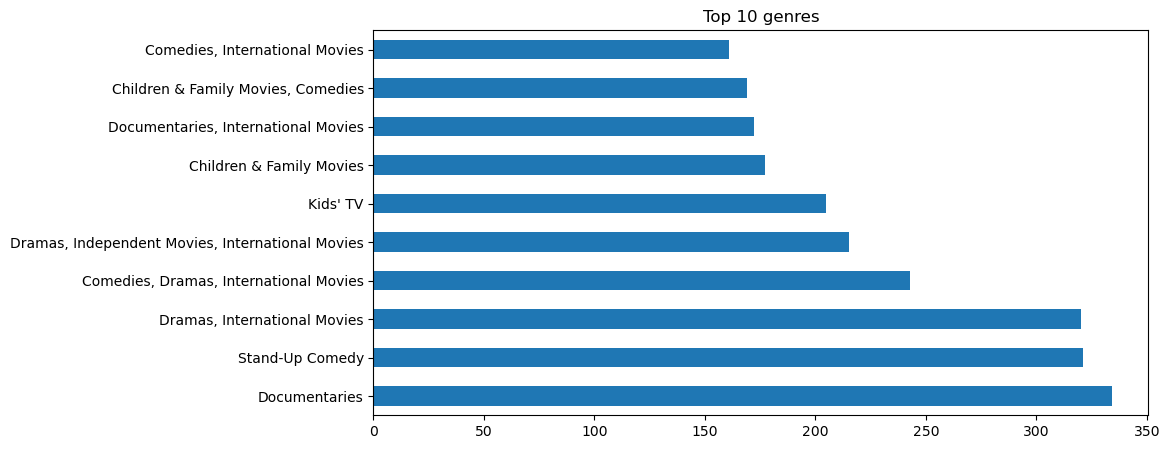

In [34]:
# Chart - 9 visualization code
# Top 10 genres 
plt.figure(figsize=(10,5))
movies.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

##### 1. Why did you pick the specific chart?

I utilized a histplot to visualize the distribution of genres in the Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

After analyzing the histplot, it is evident that documentaries, comedy, and dramas are the most popular genres on Netflix, based on their distribution in the dataset. These genres appear to have a higher representation and are likely to be well-received by Netflix viewers.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation
movies.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
day_added         10
month_added       10
year_added        10
dtype: int64

In [36]:
movies["director"]=movies["director"].fillna("unknown")

In [37]:
movies[["cast", "country"]]=movies[["cast", "country"]].fillna("unknown")

In [38]:
# for date added and rating we can use mode
movies[["date_added", "rating", "day_added", "month_added", "year_added"]]=movies[["date_added", "rating", "day_added", "month_added", "year_added"]].transform(lambda x:x.fillna(x.mode()[0]))

In [39]:
movies.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
month_added     0
year_added      0
dtype: int64

In [40]:
# Seleting prominent countries
movies["country"] = movies["country"].apply(lambda x: x.split(',')[0])

In [41]:
movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14.0,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23.0,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20.0,12.0,2018.0


### 4. Textual Data Preprocessing


#### 1. Expand Contraction

In [42]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [43]:
# Expand Contraction
import contractions

def expand_contractions(text):
    # Use the contractions library to expand contractions in the text
    expanded_text = contractions.fix(text)
    return expanded_text

In [44]:
movies["title"] = movies["title"].apply(expand_contractions)
movies["type"] = movies["type"].apply(expand_contractions)
movies["director"] = movies["director"].apply(expand_contractions)
movies["country"] = movies["country"].apply(expand_contractions)
movies["rating"] = movies["rating"].apply(expand_contractions)
movies["listed_in"] = movies["listed_in"].apply(expand_contractions)
movies["description"] = movies["description"].apply(expand_contractions)

#### 2. Lower Casing

In [45]:
# Lower Casing
def to_lower(text):
    lower_text=text.lower()
    return lower_text

In [46]:
movies["title"] = movies["title"].apply(to_lower)
movies["cast"] = movies["cast"].apply(to_lower)
movies["type"] = movies["type"].apply(to_lower)
movies["director"] = movies["director"].apply(to_lower)
movies["country"] = movies["country"].apply(to_lower)
movies["rating"] = movies["rating"].apply(to_lower)
movies["listed_in"] = movies["listed_in"].apply(to_lower)
movies["description"] = movies["description"].apply(to_lower)

In [47]:
### Removing spaces which are separated by commas

def remove_spaces_between_names(text):
    # Split the text by commas
    names = text.split(',')
    
    # Remove spaces between individual names
    cleaned_names = [name.strip().replace(' ', '') for name in names]
    
    # Join the cleaned names with commas
    cleaned_text = ', '.join(cleaned_names)
    
    return cleaned_text


In [48]:
movies["cast"] = movies["cast"].apply(remove_spaces_between_names)
movies["listed_in"] = movies["listed_in"].apply(remove_spaces_between_names)
movies["director"] = movies["director"].apply(remove_spaces_between_names)

#### 3. Removing Punctuations

In [49]:
import re
import unicodedata

def remove_punc(text):
    # Normalize text by removing accents and converting to NFC form
    normalized_text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')
    
    # Remove punctuation characters from the text, except for alphabets and numbers
    punc_text = re.sub('[^a-zA-Z0-9]', ' ', normalized_text)
    
    return punc_text

In [50]:
movies["title"] = movies["title"].apply(remove_punc)
movies["cast"] = movies["cast"].apply(remove_punc)
movies["type"] = movies["type"].apply(remove_punc)
movies["director"] = movies["director"].apply(remove_punc)
movies["country"] = movies["country"].apply(remove_punc)
movies["rating"] = movies["rating"].apply(remove_punc)
movies["listed_in"] = movies["listed_in"].apply(remove_punc)
movies["description"] = movies["description"].apply(remove_punc)

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits
def remove_urls(text):
    # Convert the input to a string if it's not already
    text = str(text)
    
    # Remove URLs using regular expression
    url_pattern = r'http\S+|www\S+'
    no_urls_text = re.sub(url_pattern, '', text)
    return no_urls_text



In [52]:
movies["title"] = movies["title"].apply(remove_urls)
movies["cast"] = movies["cast"].apply(remove_urls)
movies["type"] = movies["type"].apply(remove_urls)
movies["director"] = movies["director"].apply(remove_urls)
movies["country"] = movies["country"].apply(remove_urls)
movies["rating"] = movies["rating"].apply(remove_urls)
movies["listed_in"] = movies["listed_in"].apply(remove_urls)
movies["description"] = movies["description"].apply(remove_urls)

#### 5. Removing Stopwords & Removing White spaces

In [53]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    # Tokenize the text into individual words
    words = text.split()
    
    # Remove stopwords from the list of words
    stopwords_list = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stopwords_list]
    
    # Join the remaining words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajeev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
movies["cast"] = movies["cast"].apply(remove_stopwords)
movies["type"] = movies["type"].apply(remove_stopwords)
movies["director"] = movies["director"].apply(remove_stopwords)
movies["country"] = movies["country"].apply(remove_stopwords)
movies["rating"] = movies["rating"].apply(remove_stopwords)
movies["listed_in"] = movies["listed_in"].apply(remove_stopwords)
movies["description"] = movies["description"].apply(remove_stopwords)

In [55]:
# Remove White spaces
def remove_whitespace(text):
    # Replace white spaces with empty string
    cleaned_text = text.replace(" ", "")
    
    return cleaned_text


In [56]:
movies["type"] = movies["type"].apply(remove_whitespace)
movies["director"] = movies["director"].apply(remove_whitespace)
movies["country"] = movies["country"].apply(remove_whitespace)
movies["rating"] = movies["rating"].apply(remove_whitespace)


#### 7. Tokenization

In [57]:
# Tokenization
def word_token(text):
    tokens=nltk.word_tokenize(text)
    return tokens


In [58]:
movies["title"] = movies["title"].apply(word_token)
movies["cast"] = movies["cast"].apply(word_token)
movies["type"] = movies["type"].apply(word_token)
movies["director"] = movies["director"].apply(word_token)
movies["country"] = movies["country"].apply(word_token)
movies["rating"] = movies["rating"].apply(word_token)
movies["listed_in"] = movies["listed_in"].apply(word_token)
movies["description"] = movies["description"].apply(word_token)

#### 8. Text Normalization

In [59]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
## Steamming

from nltk.stem import PorterStemmer

def stem_words(text):
    stemmer=PorterStemmer()
    stemmed_words=[stemmer.stem(words) for words in text]
    return stemmed_words

In [60]:
movies["listed_in"] = movies["listed_in"].apply(stem_words)
movies["description"] = movies["description"].apply(stem_words)

In [61]:
movies.listed_in.head(2)

0    [internationaltvshow, tvdrama, tvsci, fi, fant...
1                           [drama, internationalmovi]
Name: listed_in, dtype: object

In [62]:
# Creating New DataFrame for clustering
cluster_movie = pd.DataFrame()

In [63]:
# Creating Tag column in the dataframe
cluster_movie['tags'] = movies[["title", "cast", "type", "director", "country", "rating", "listed_in", "description"]].apply(lambda row: ', '.join([item for sublist in row for item in sublist]), axis=1)

In [64]:
cluster_movie.iloc[0].tags

'3, joaomiguel, biancacomparato, michelgomes, rodolfovalente, vanezaoliveira, rafaellozano, vivianeporto, melfronckowiak, sergiomamberti, zezemotta, celsofrateschi, tvshow, unknown, brazil, tv, internationaltvshow, tvdrama, tvsci, fi, fantasi, futur, elit, inhabit, island, paradis, far, crowd, slum, get, one, chanc, join, 3, save, squalor'

### Text Vectorization

In [65]:
# Importing gensim Lib for Word Emmbeding
import gensim

In [66]:
# Implementing Word2Vec model
model=  gensim.models.Word2Vec(
    window=10, min_count=2, workers=4
)

In [67]:
# Building Vocabulary
model.build_vocab(cluster_movie["tags"], progress_per=1000)

In [68]:
# Train the model
model.train(cluster_movie["tags"], total_examples=model.corpus_count, epochs=model.epochs)

(2090235, 11568800)

## ***7. ML Model Implementation***

### ML Model - 1

In [69]:
# Document Emmbeding For Word2Vec

document_embeddings = []
for doc_tags in cluster_movie["tags"]:
    embeddings = [model.wv[word] for word in doc_tags if word in model.wv]
    if embeddings:
        doc_embedding = np.mean(embeddings, axis=0)
        document_embeddings.append(doc_embedding)

#### K-Means Clustering Algorithm

In [70]:
# Calculating Optimum Value of Cluster

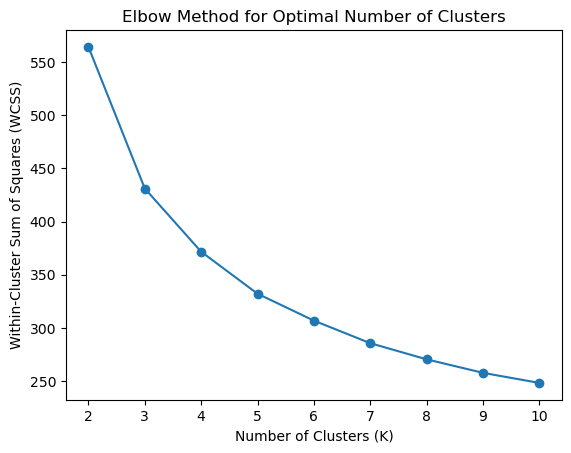

Optimal Number of Clusters (Elbow Method): 2


In [71]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# WCSS for different numbers of clusters
wcss_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(document_embeddings)
    wcss_scores.append(kmeans.inertia_)

# Step 7: Visualizing WCSS using the elbow method
plt.plot(range(2, 11), wcss_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Elbow Method: Find the index of the point with the maximum curvature using the first derivative.
diff_wcss = np.diff(wcss_scores)
diff2_wcss = np.diff(diff_wcss)
elbow_index = np.argmax(diff2_wcss) + 2
print(f"Optimal Number of Clusters (Elbow Method): {elbow_index}")

In [72]:
# Checking Silhoutte Score for better clarification

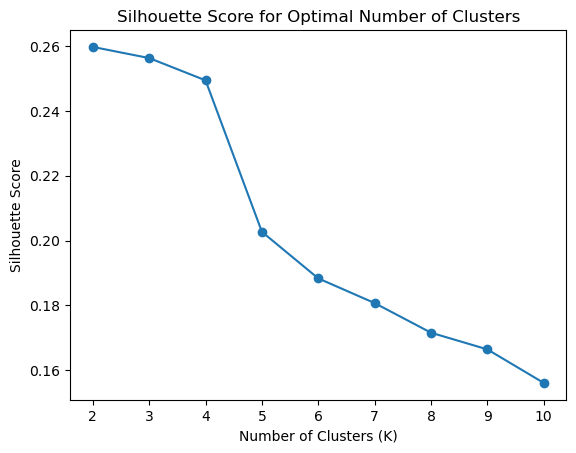

Optimal Number of Clusters (Silhouette Score): 2


In [73]:
# Silhouette score for different numbers of clusters
silhouette_scores = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_ids = kmeans.fit_predict(document_embeddings)
    silhouette_avg = silhouette_score(document_embeddings, cluster_ids)
    silhouette_scores.append(silhouette_avg)

# Visualize the silhouette scores.
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

# Silhouette Score:
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2
print(f"Optimal Number of Clusters (Silhouette Score): {optimal_clusters_silhouette}")


In [74]:
# ML Model - 1 Implementation K-Mean Clustering
## Choosing the number of clusters (K) for K-Means clustering
num_clusters = 2

## Apply K-Means clustering on the document embeddings.
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# Fit the Algorithm
cluster_ids = kmeans.fit_predict(document_embeddings)

# Adding a new column in 'cluster_movie' DataFrame to store the cluster assignments.
cluster_movie["kmean_cluster_id"] = cluster_ids

for cluster_id in range(num_clusters):
    cluster_documents = cluster_movie[cluster_movie["kmean_cluster_id"] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_documents["tags"])
    # For visualising purpose
    print("--------------------------------------")

Cluster 0:
0       3, joaomiguel, biancacomparato, michelgomes, r...
1       7, 19, demianbichir, hectorbonilla, oscarserra...
2       23, 59, teddchan, stellachung, henleyhii, lawr...
3       9, elijahwood, johnc, reilly, jenniferconnelly...
7       187, samuell, jackson, johnheard, kellyrowan, ...
                              ...                        
7779    zona, rosa, manunna, anajuliayeye, raycontrera...
7781    zoom, timallen, courteneycox, chevychase, kate...
7784    zulu, man, in, japan, nastyc, movie, unknown, ...
7785    zumbo, s, just, desserts, adrianozumbo, rachel...
7786    zz, top, that, little, old, band, from, texas,...
Name: tags, Length: 3725, dtype: object
--------------------------------------
Cluster 1:
4       21, jimsturgess, kevinspacey, katebosworth, aa...
5       46, erdalbesikcioglu, yaseminallen, melisbirka...
6       122, aminakhalil, ahmeddawood, tareklotfy, ahm...
8       706, divyadutta, atulkulkarni, mohanagashe, an...
9       1920, rajneeshduggal,

### ML Model - 2

####  Agglomerative Clustering

In [75]:
from sklearn.cluster import AgglomerativeClustering


num_clusters = 2

# Applying Agglomerative Clustering on the document embeddings.
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)

# Fitting the algorithm
cluster_ids = agg_clustering.fit_predict(document_embeddings)

# Adding new column in 'cluster_movie' DataFrame to store the cluster assignments.
cluster_movie["cluster_id_agg"] = cluster_ids

# Exploring the clustered documents and analyze the results.
for cluster_id in range(num_clusters):
    cluster_documents = cluster_movie[cluster_movie["cluster_id_agg"] == cluster_id]
    print(f"Agglomerative Cluster {cluster_id}:")
    print(cluster_documents["tags"])
    print("--------------------------------------")

Agglomerative Cluster 0:
0       3, joaomiguel, biancacomparato, michelgomes, r...
1       7, 19, demianbichir, hectorbonilla, oscarserra...
2       23, 59, teddchan, stellachung, henleyhii, lawr...
3       9, elijahwood, johnc, reilly, jenniferconnelly...
4       21, jimsturgess, kevinspacey, katebosworth, aa...
                              ...                        
7778    zombieland, jesseeisenberg, woodyharrelson, em...
7780    zoo, shashankarora, shwetatripathi, rahulkumar...
7781    zoom, timallen, courteneycox, chevychase, kate...
7782    zozo, imadcreidi, antoinetteturk, eliasgergi, ...
7783    zubaan, vickykaushal, sarah, janedias, raaghav...
Name: tags, Length: 5237, dtype: object
--------------------------------------
Agglomerative Cluster 1:
7       187, samuell, jackson, johnheard, kellyrowan, ...
12      1994, unknown, tvshow, diegoenriqueosorno, mex...
13      2, 215, artiwarakongmalai, movie, nottaponboon...
19      89, leedixon, ianwright, paulmerson, movie, un...
2

In [76]:
# Calculating the silhouette score for Agglomerative Clustering
silhouette_avg_agg = silhouette_score(document_embeddings, cluster_ids)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg_agg}")

Silhouette Score for Agglomerative Clustering: 0.25468939542770386


In [77]:
# Visualizing the Clustering

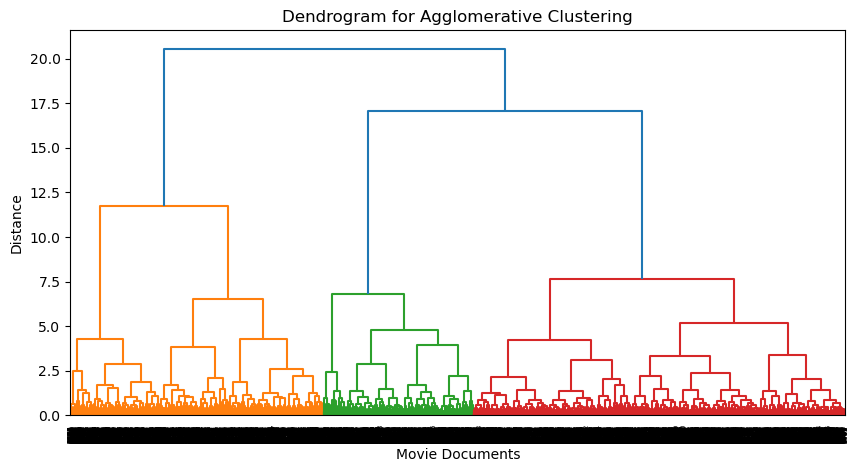

In [78]:
# Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(document_embeddings, method='ward') # You can use different linkage methods.
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Movie Documents')
plt.ylabel('Distance')
plt.show()

# **Conclusion**

This project showcased the power of unsupervised learning techniques and NLP in analyzing and clustering vast datasets. The knowledge gained from this endeavor could serve as a foundation for future content recommendation systems or other data-driven strategies within the Netflix platform